In [7]:
import numpy as np
np.random.seed(0)
rewards = []

for n in range(1, 11):
    reward = np.random.rand()
    rewards.append(reward)
    Q = sum(rewards) / n
    print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571295
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


In [11]:
np.random.seed(0)
Q = 0

for n in range(1,11):
    reward = np.random.rand()
    Q = Q + (reward - Q) / n
    print(Q)


0.5488135039273248
0.6320014351498722
0.6222554154571294
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


## Bandit

In [3]:
import numpy as np

class Bandit:
    def __init__(self, arms=10, debug=False):
        self.rates = np.random.rand(arms)
        if debug:
            print(self.rates)

    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [15]:
bandit = Bandit()

for i in range(3):
    print(bandit.play(0))

0
0
1


In [18]:
bandit = Bandit()
Q = 0

for n in range(1, 11):
    reward = bandit.play(0)
    Q += (reward - Q) / n
    print(Q)

0.0
0.0
0.3333333333333333
0.25
0.4
0.33333333333333337
0.4285714285714286
0.375
0.3333333333333333
0.4


In [23]:
# 10台のスロットマシンそれぞれの価値推定

bandit = Bandit(debug=True)
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(1000):
    action = np.random.randint(0, 10)
    reward = bandit.play(action)

    ns[action] += 1
    Qs[action] += (reward - Qs[action]) / ns[action]
    
    if n % 100 == 0:
        print(n, Qs)

[0.07952208 0.08960303 0.67204781 0.24536721 0.42053947 0.55736879
 0.86055117 0.72704426 0.27032791 0.1314828 ]
0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
100 [0.18181818 0.         0.53846154 0.28571429 0.5        0.66666667
 0.88888889 0.6        0.4        0.18181818]
200 [0.12       0.05263158 0.6        0.30769231 0.52941176 0.69230769
 0.82608696 0.75       0.4        0.13636364]
300 [0.12121212 0.03333333 0.67567568 0.22222222 0.5        0.64705882
 0.82857143 0.67741935 0.31578947 0.09677419]
400 [0.11627907 0.06976744 0.63461538 0.21428571 0.54285714 0.60465116
 0.83783784 0.66666667 0.28571429 0.08333333]
500 [0.11764706 0.09090909 0.64615385 0.21568627 0.53488372 0.57142857
 0.86046512 0.73214286 0.26190476 0.10869565]
600 [0.12068966 0.07692308 0.65333333 0.26984127 0.52       0.56896552
 0.875      0.72058824 0.26415094 0.09090909]
700 [0.10769231 0.07894737 0.67073171 0.24       0.49152542 0.61971831
 0.89393939 0.70886076 0.24590164 0.08955224]
800 [0.11842105 0.08333333 0.67741

In [4]:
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward):
        # action は要するにスロットマシンの番号。これロボット操作みたいにアクションが無数にあったらどうするんだろう？
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        else:
            return np.argmax(self.Qs)


[0.54132154 0.48585832 0.5566086  0.15328852 0.63846732 0.56448546
 0.38399091 0.47572482 0.25442299 0.51063997]
491


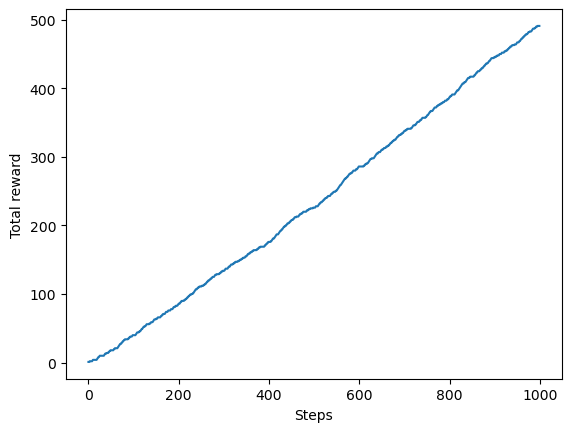

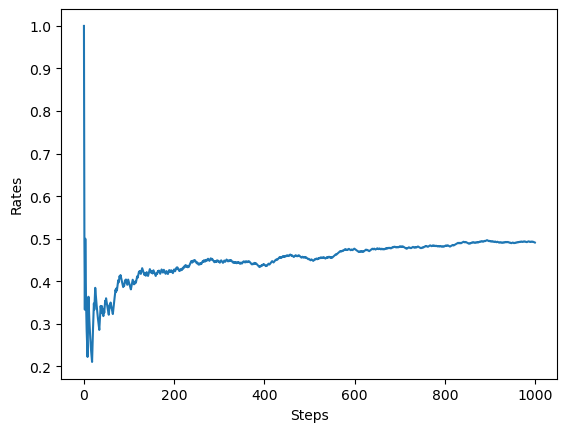

In [29]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit(debug=True)
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step+1))

print(total_reward)

plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()


勝率の理論値はBanditの最も甘い腕のRateに等しい。  
何度か試してみたが、コミットした回のように全ての腕が渋い場合、当然勝率も低くなるのが観測できた。

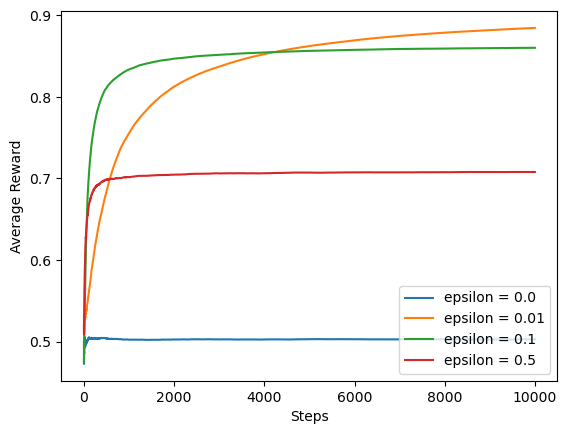

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def run_bandit_avg_by(epsilon=0.1):
    runs = 200
    steps = 10000
    all_rates = np.zeros((runs, steps))

    for run in range(runs):
        bandit = Bandit()
        agent = Agent(epsilon)
        total_reward = 0
        rates = []

        for step in range(steps):
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            total_reward += reward
            rates.append(total_reward / (step+1))

        all_rates[run] = rates

    avg_rates = np.average(all_rates, axis=0)    
    return avg_rates

epsilons = [0.0, 0.01, 0.1, 0.5]
avg_rates = {}
for epsilon in epsilons:
    avg_rates[str(epsilon)] = run_bandit_avg_by(epsilon)

for epsilon, rates in avg_rates.items():
    plt.plot(rates, label='epsilon = {}'.format(epsilon))

plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.show()


epsilon0.01が0.1を追い抜くのに4000stepsも必要とは驚いた。  
（多分後から言及されるが）環境が同じなら、だんだんepsilonを下げていくのが良さそうだ。

## 非定常問題

In [12]:
class NonStatBandit: 
    def __init__(self, arms=10): 
        self.arms = arms 
        self.rates = np.random.rand(arms) 
        
    def play(self, arm): 
        rate = self.rates[arm] 
        self.rates += 0.1 * np.random.randn(self.arms) # Adding noise
        if rate > np.random.rand(): 
            return 1 
        else: 
            return 0


In [13]:

class AlphaAgent:
    def __init__(self, epsilon, alpha, actions=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha

    def update(self, action, reward):
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

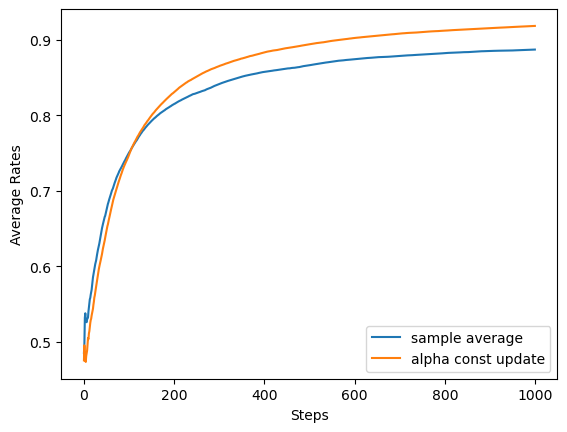

In [14]:
runs = 200
steps = 1000
epsilon = 0.1
alpha = 0.8
agent_types = ['sample average', 'alpha const update']
results = {}

for agent_type in agent_types:
    all_rates = np.zeros((runs, steps))  # (200, 1000)

    for run in range(runs):
        if agent_type == 'sample average':
            agent = Agent(epsilon)
        else:
            agent = AlphaAgent(epsilon, alpha)

        bandit = NonStatBandit()
        total_reward = 0
        rates = []

        for step in range(steps):
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            total_reward += reward
            rates.append(total_reward / (step + 1))

        all_rates[run] = rates

    avg_rates = np.average(all_rates, axis=0)
    results[agent_type] = avg_rates

# plot
plt.figure()
plt.ylabel('Average Rates')
plt.xlabel('Steps')
for key, avg_rates in results.items():
    plt.plot(avg_rates, label=key)
plt.legend()
plt.show()